In [13]:
import pickle
import pydot
from IPython.display import SVG
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

from keras.models import model_from_json
from keras.utils.vis_utils import plot_model
from keras.utils.vis_utils import model_to_dot

#### 绘制dnn_lstm模型结构图

In [3]:
# 加载模型
def load_model(name):
    architecture_path = "model/{}/{}_model_architecture.json".format(name, name)
    weight_path = "model/{}/{}_model_weights.best.h5".format(name, name)
    model = model_from_json(open(architecture_path).read())
    model.load_weights(weight_path)
    return model

In [6]:
lstm_model = load_model('lstm')
plot_model(lstm_model, to_file='model/lstm/lstm.png',show_shapes=True)
# SVG(model_to_dot(lstm_model).create(prog='dot', format='svg'))

In [7]:
lstm_model = load_model('dnn_lstm')
plot_model(lstm_model, to_file='model/dnn_lstm/dnn_lstm.png',show_shapes=True)

#### 绘制训练过程图

In [3]:
# 加载模型
def load_train_process_data(name):
    history_path = "model/{}/{}_history.pkl".format(name, name)
    history = pickle.load(open(history_path, 'rb'))
    return history

In [6]:
model_list = ['dnn', 'lstm', 'bilstm', 'gru', 'bigru', 'dnn_lstm']
history_dict = { model_name:load_train_process_data(model_name) for model_name in model_list}

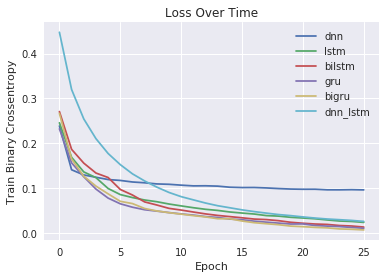

In [22]:
# 训练损失
for model_name in model_list:
    plt.plot(history_dict[model_name]['loss'][:26])
plt.xlabel('Epoch')
plt.ylabel('Train Binary Crossentropy')
plt.title('Loss Over Time')
plt.legend(model_list)

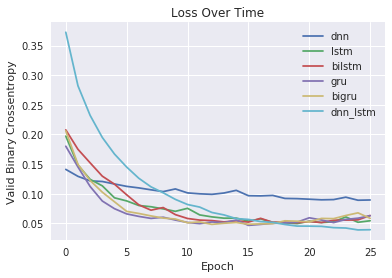

In [26]:
# 验证集损失
for model_name in model_list:
    plt.plot(history_dict[model_name]['val_loss'][:26])
plt.xlabel('Epoch')
plt.ylabel('Valid Binary Crossentropy')
plt.title('Loss Over Time')
plt.legend(model_list)

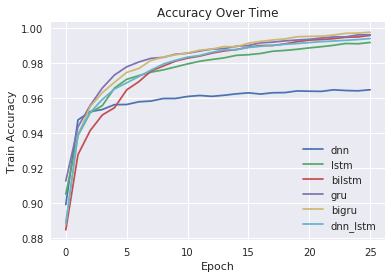

In [30]:
# 训练准确度
for model_name in model_list:
    plt.plot(history_dict[model_name]['acc'][:26])
plt.xlabel('Epoch')
plt.ylabel('Train Accuracy')
plt.title('Accuracy Over Time')
plt.legend(model_list)

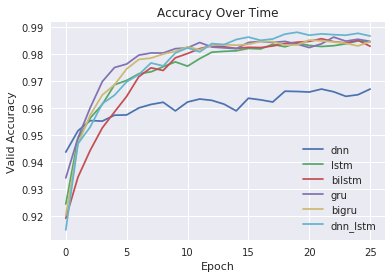

In [29]:
# 训练准确度
for model_name in model_list:
    plt.plot(history_dict[model_name]['val_acc'][:26])
plt.xlabel('Epoch')
plt.ylabel('Valid Accuracy')
plt.title('Accuracy Over Time')
plt.legend(model_list)

#### 五折训练过程

In [32]:
# 加载模型
def load_train_fold_process_data(name, n_fold):
    history_path = "model/{}/{}_history_fold_{}.pkl".format(name, name, n_fold)
    history = pickle.load(open(history_path, 'rb'))
    return history

In [34]:
dnn_lstm_fold_history_dict = { 'dnn_lstm_'+str(idx):load_train_fold_process_data('dnn_lstm', idx) for idx in range(1,6)}
# dnn_lstm_fold_history_dict

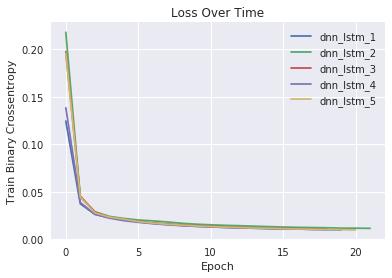

In [37]:
# 训练损失
model_names = list()
for idx in range(1,6):
    model_name = 'dnn_lstm_'+str(idx)
    plt.plot(dnn_lstm_fold_history_dict[model_name]['loss'][:])
    model_names.append(model_name)
plt.xlabel('Epoch')
plt.ylabel('Train Binary Crossentropy')
plt.title('Loss Over Time')
plt.legend(model_names)